<a href="https://colab.research.google.com/github/weso500/QMLIIOT/blob/main/TEP_PCA_QSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.3/418.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
pip install scikit-fda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 5.6 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

In [ ]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA
from skfda.misc.covariances import Exponential, Gaussian
from skfda.misc.metrics import l2_distance, l2_norm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import math
from sklearn.metrics import classification_report

In [ ]:
def round_down_to_decimals(number, num_decimals):
    multiplier = 10 ** num_decimals
    return math.floor(number * multiplier) / multiplier

In [ ]:
import pywt
import numpy as np
import pandas as pd
import pyreadr
from sklearn.preprocessing import StandardScaler


fault_numbers_to_select = [9]
# Load data
df_FaultFree = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'/content/drive/MyDrive/FDA Journal/TEP_Faulty_Training.RData')['faulty_training']

df_train_good = df_FaultFree.iloc[:, 3:]
df_test_bad_raw = df_Faulty.loc[
    (df_Faulty['faultNumber'].isin(fault_numbers_to_select)) &
    (df_Faulty['sample'] > 20.0),
    df_Faulty.columns[3:]
]
# Create sliding windows for good data
stride = 200
window_size = 200
windows_good = np.lib.stride_tricks.sliding_window_view(df_train_good, window_shape=(window_size, 1))
strided_windows_good = windows_good[::stride]
df_sliding_window_good = pd.DataFrame(strided_windows_good.reshape(strided_windows_good.shape[0], -1))

# Create sliding windows for bad data
windows_bad = np.lib.stride_tricks.sliding_window_view(df_test_bad_raw, window_shape=(window_size, 1))
strided_windows_bad = windows_bad[::stride]
df_sliding_window_bad = pd.DataFrame(strided_windows_bad.reshape(strided_windows_bad.shape[0], -1))

# Normalize the wavelet features
scaler = StandardScaler()
df_scaled_good = scaler.fit_transform(df_sliding_window_good)

# Use the same scaler fitted on good data to transform the bad data
df_scaled_bad = scaler.transform(df_sliding_window_bad)


print("Shape of scaled good data:", df_scaled_good.shape)
print("Shape of scaled bad data:", df_scaled_bad.shape)

Shape of scaled good data: (1250, 10400)
Shape of scaled bad data: (1200, 10400)


In [ ]:
import numpy as np
import pandas as pd
import pyreadr
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def round_down_to_decimals(number, decimals):
    factor = 10 ** decimals
    return np.floor(number * factor) / factor

def calculate_reconstruction_error(model, data):
    recon = model.inverse_transform(model.transform(data))
    return np.linalg.norm(data - recon, axis=1)
auctotal = []
f1total = []
precisiontotal = []
recalltotal = []
accuracytotal = []

for i in range(1):
  num_test_samples_good = 50
  # Use np.random.choice to select indices and then index the array
  good_indices = np.random.choice(df_scaled_good.shape[0], size=num_test_samples_good, replace=False)
  X_test_scaled = df_scaled_good[good_indices]

  all_good_indices = np.arange(df_scaled_good.shape[0])
  # Find the indices that are NOT in the training indices
  remaining_good_indices = np.setdiff1d(all_good_indices, good_indices)
  # Create the new dataset with the remaining good samples
  X_train_scaled = df_scaled_good[remaining_good_indices]

  num_train = 200
  # Use np.random.choice to select indices and then index the array
  train_indices = np.random.choice(X_train_scaled.shape[0], size=num_train, replace=False)
  x_train  = X_train_scaled[train_indices]
  # Randomly sample 10 samples from df_scaled_bad for testing
  num_test_samples_bad = 10
  # Use np.random.choice to select indices and then index the array
  bad_indices = np.random.choice(df_scaled_bad.shape[0], size=num_test_samples_bad, replace=False)
  X_test_bad_scaled = df_scaled_bad[bad_indices]

  X_test = np.concatenate((X_test_scaled, X_test_bad_scaled), axis=0)

  pca_model = PCA(n_components=9)
  pca_model.fit(X_train_scaled)
  x_train_pca = pca_model.transform(x_train)
  x_test_pca = pca_model.transform(X_test)



print(x_train_pca.shape)
print(x_test_pca.shape)

(200, 9)
(60, 9)


In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = PauliFeatureMap(
    feature_dimension=8,
    paulis=['Z','ZZ','X'],    # tiny dash of X to enrich without blowing up
    reps=1,
    entanglement='full'
)
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [ ]:
Xtr_raw = x_train_pca
Xte_raw = x_test_pca

# ================== 3) Standardize (fit on train normals only) ==================
scaler = StandardScaler().fit(Xtr_raw)
Xtr_s = scaler.transform(Xtr_raw)
Xte_s = scaler.transform(Xte_raw)

In [ ]:
matrix_train = kernel.evaluate(x_vec=Xtr_s)
matrix_test = kernel.evaluate(x_vec=Xte_s, y_vec=Xtr_s )

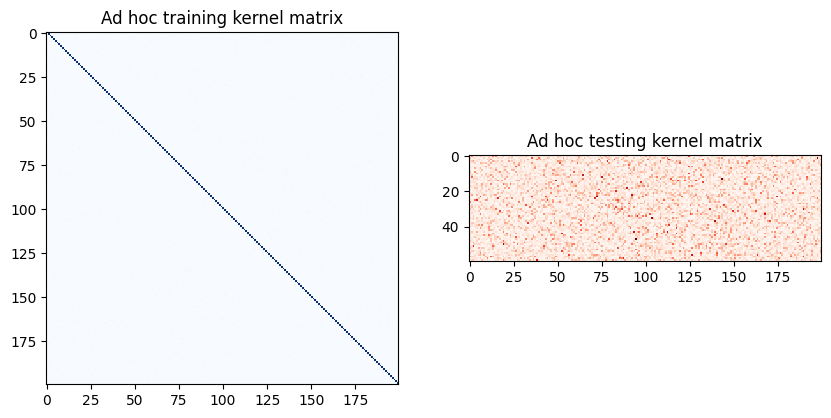

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='precomputed', nu=0.08)  # nu = anomaly proportion
ocsvm.fit(matrix_train)

OneClassSVM(kernel='precomputed', nu=0.08)

In [ ]:
scores = ocsvm.decision_function(matrix_test)
print(scores)

[-0.08121854 -0.07997676 -0.07850413 -0.07532505 -0.07458994 -0.08622001
 -0.08071706 -0.08393499 -0.0837491  -0.08297762 -0.0804374  -0.08140416
 -0.07756474 -0.08077982 -0.07984756 -0.08304078 -0.07434693 -0.08302268
 -0.08230514 -0.0805845  -0.08472595 -0.07830236 -0.07832991 -0.08108173
 -0.08091909 -0.0761418  -0.08665889 -0.07990168 -0.08118901 -0.07818116
 -0.07902326 -0.07995178 -0.07948756 -0.0770742  -0.08050826 -0.07919782
 -0.08352509 -0.08265047 -0.07893102 -0.07862292 -0.08029689 -0.07858898
 -0.08337877 -0.08162476 -0.08225733 -0.08121447 -0.07770281 -0.07860508
 -0.08818663 -0.08135198 -0.07343533 -0.08245338 -0.07969148 -0.08245609
 -0.07908388 -0.083129   -0.07672166 -0.08105084 -0.07781811 -0.08128014]


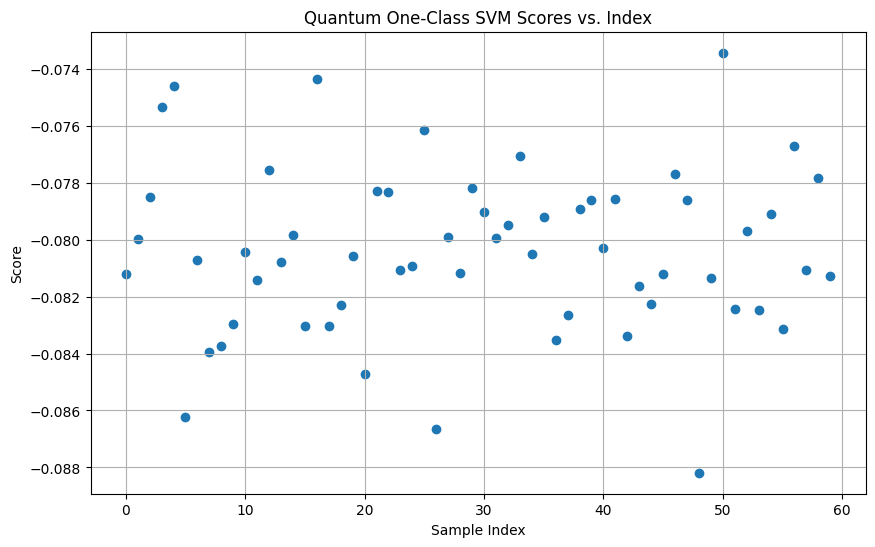

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of scores vs. index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores)
plt.title("Quantum One-Class SVM Scores vs. Index")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:
test_target = np.concatenate((np.zeros(50), np.ones(10)))

In [ ]:
import numpy as np
import pandas as pd
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



fpr, tpr, thresholds = metrics.roc_curve(test_target, scores, pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
loss_threshold = (thresholds[optimal_idx], 6)

auc = metrics.auc(fpr, tpr)
print(auc)

0.55


In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM()  # nu = anomaly proportion
ocsvm.fit(Xtr_s)



OneClassSVM()

In [ ]:
scores = -ocsvm.decision_function(Xte_s)
print(scores)

[-1.2768083  -3.42350897 -7.63896893  0.0381124  -7.61676245 -8.32719164
 -2.54706525  1.87971017  1.99505682  0.08366941  1.20189198  0.06922738
 -2.55364432 -3.08998409 -4.32297408 -6.94114578  1.65673691 -5.25766576
 -7.16235546  2.19827318 -3.30951712 -1.51759088  7.53549417 -1.25245692
 -2.4052601   2.30992774  9.34584288 -8.8425287  -4.54173663  3.41995757
  2.74848341 -2.44949575  0.84328484 -2.28699068  1.84344165 -5.86090043
 -0.25785855 -1.94814285 -4.88285004  1.2385684   2.45851137  2.04171271
  0.10403766 -6.29601367  4.30011234 -3.9919507   2.76158715 -4.63640145
  6.16146048 -8.48214756  0.6351282   1.24987208  3.9717809   4.5546389
 -0.12001676  1.65480567  3.2763861  -4.33334045 -2.80723635  1.48955041]


In [ ]:


import numpy as np
import pandas as pd
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



fpr, tpr, thresholds = metrics.roc_curve(test_target, scores, pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
loss_threshold = (thresholds[optimal_idx], 6)

auc = metrics.auc(fpr, tpr)
print(auc)


0.668
